# Lab 11 - Model Selection

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
import time
from sklearn.linear_model import LassoLarsIC
from sklearn.pipeline import make_pipeline


## Question Set 1

We will be using the cars2010 dataset for this question. As a reminder, this is the training dataset, so do not create a training and test dataset. Any regression methods used will be using FE as the response. EngDispl is the only continuous predictor; all other predictors are categorical.

In [7]:
cars = pd.read_csv('https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/cars2010.csv')

### Question 1a

Perform a LASSO regression predicting the FE variable using all of the remaining variables. What is the r-squared value/score (hint: Python code from the book produces this very nicely). Use alpha = .01 and max iterations = 5000. Round to 4 decimals.

In [61]:
cars = cars[['FE', 'EngDispl', 'NumCyl', 'Transmission', 'AirAspirationMethod',
       'NumGears', 'TransLockup', 'TransCreeperGear', 'DriveDesc',
       'IntakeValvePerCyl', 'ExhaustValvesPerCyl', 'CarlineClassDesc',
       'VarValveTiming', 'VarValveLift']]

cars_dummy = pd.get_dummies(cars, columns = ['NumCyl', 'Transmission', 'AirAspirationMethod',
       'NumGears', 'TransLockup', 'TransCreeperGear', 'DriveDesc',
       'IntakeValvePerCyl', 'ExhaustValvesPerCyl', 'CarlineClassDesc',
       'VarValveTiming', 'VarValveLift'])

y = cars_dummy['FE']

X = cars_dummy.loc[:, cars_dummy.columns != 'FE']


numeric_cols = cars_dummy.select_dtypes(include=['number']).columns
scaler = StandardScaler()
cars_dummy[numeric_cols] = scaler.fit_transform(cars_dummy[numeric_cols])

y = cars_dummy['FE']

X = cars_dummy.loc[:, cars_dummy.columns != 'FE']

cars_lasso = Lasso(alpha = 0.01, max_iter=5000).fit(X, y)
print(cars_lasso.score(X, y))

0.769101053972318


### Question 1b

Now, perform Ridge regression on the same variables as part a). What is the r-squared value/score? Use alpha = 1.0. Round to 4 decimals

In [62]:
cars_ridge = Ridge(alpha = 1, max_iter=5000).fit(X, y)
print(cars_ridge.score(X, y))

0.8314630329820492


### Question 1c

Perform a 10-fold CV LASSO regression to optimize the lambda value. What is the optimal alpha value? Round to 6 decimals.

In [63]:
cars_lasso_cv = LassoCV(cv = 10, random_state = 0).fit(X, y)

cars_lasso_cv.alpha_

np.float64(0.0007873938257311004)

### Question 1d

What is the shape of the graph of the Mean Square Errors vs alpha for the CV LASSO regression?



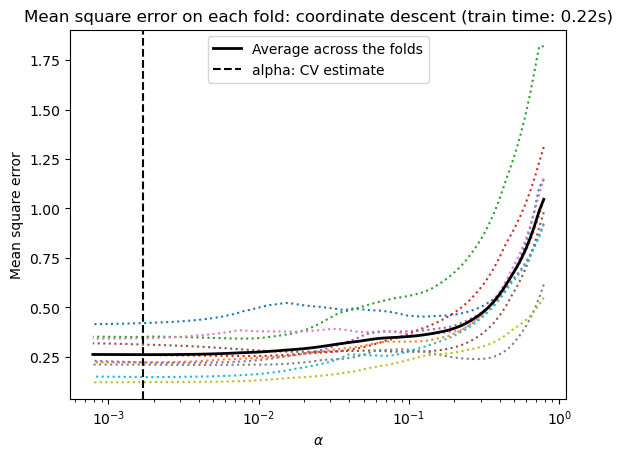

In [65]:
start_time = time.time()
model = make_pipeline(StandardScaler(), LassoCV(cv = 10)).fit(X, y)
fit_time = time.time() - start_time

lasso = model[-1]
plt.semilogx(lasso.alphas_, lasso.mse_path_, linestyle=":")
plt.plot(
    lasso.alphas_,
    lasso.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lasso.alpha_, linestyle="--", color="black", label="alpha: CV estimate")

plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
_ = plt.title(
    f"Mean square error on each fold: coordinate descent (train time: {fit_time:.2f}s)"
)

plt.show()

## Question Set 2

For this question, we will revisit the bike data. First, we need to split the data into training and test. Run the following code to get the training and test split.

seed = 123
np.random.seed(seed)

bike['id'] = bike.index + 1
train = bike.sample(frac=0.7, random_state=seed)
test = bike[~bike['id'].isin(train['id'])]

In [55]:
bike = pd.read_csv("https://raw.githubusercontent.com/IAA-Faculty/statistical_foundations/refs/heads/master/bike.csv")

seed = 123
np.random.seed(seed)

bike['id'] = bike.index + 1
train = bike.sample(frac=0.7, random_state=seed)
test = bike[~bike['id'].isin(train['id'])]

### Question 2a

How many observations are in the train dataset?

In [56]:
train.shape

(12165, 17)

### Question 2b

How many observations are in the test dataset?

In [28]:
test.shape

(5214, 17)

In [67]:
train.dtypes

dteday          int64
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
id              int64
dtype: object

### Question 2c

You can't decide which variable is better to predict the number of users (cnt), actual temperature (temp) or what the temperature feels like (atemp). You know that they are highly correlated (corr of approx .99), but you feel that each might still provide some valuable information. Maybe the temperature provides (ever so slightly) different information than the feeling temperature. To keep them both in the model, build a ridge regression model that has four variables, actual temperature (temp), feeling temperature (atemp), humidity (hum), and wind speed (windspeed). Use CV to find the penalty that minimizes the MSE. What is the optimal alpha/lambda value? Round to 6 decimals.

In [69]:
bike_regression = bike[['cnt', 'temp', 'hum', 'atemp', 'windspeed']]

scaler = StandardScaler()
bike_regression[['cnt', 'temp', 'hum', 'atemp', 'windspeed']] = scaler.fit_transform(bike_regression[['cnt', 'temp', 'hum', 'atemp', 'windspeed']])

y = bike_regression['cnt']
X = bike_regression[['temp', 'hum', 'atemp', 'windspeed']]

cars_lasso_cv = LassoCV(cv = 10, random_state = 0).fit(X, y)

cars_lasso_cv.alpha_

C:\Users\wdcru\AppData\Local\Temp\ipykernel_21960\3963903650.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_regression[['cnt', 'temp', 'hum', 'atemp', 'windspeed']] = scaler.fit_transform(bike_regression[['cnt', 'temp', 'hum', 'atemp', 'windspeed']])


np.float64(0.008132818150178425)